# 1. Business Understanding

### 1.1 Overview
Immunization is an essential, cost-effective strategy to reduce childhood morbidity and mortality which saves an estimated 2 to 3 million lives each year. In their 2018 Strategy for Immunization and PHC System Strengthening, Nigeria committed to investing in strengthening immunization service delivery, expanding cold chain capacity, improving data quality, introducing new vaccines and addressing significant risk of vaccine-preventable diseases including measles, yellow fever and meningitis over the Gavi transition period 2018 – 2028.
In 2017, routine immunization was declared a Public Health Concern, which led to operationalizing the National Emergency Routine Immunization Coordination Centres (NERICC) in low performing states and LGAs. 

#### 1.2 Objective
The objective of this data science project is to analyze and derive insights from the vaccination rates of children aged 12-23 months against preventable childhood diseases in Nigeria.

# 2. Data Understanding

This data was collected from the National Nutrition and Health Survey conducted in 37
domains, 36 states and Federal Capital Territory (FCT) between February 19 and June 2, 2018. The data will be extracted from the [opendataAfrica website](https://africaopendata.org/dataset/vaccination_coverage_2018/resource/e2bcc139-4c7a-4096-945b-912a0f8b5385), an API is provided to extract the data for an analysis. 
The data includes information about the states in Nigeria, the types of vaccine administered and the total percentage of children immunized.

This phase is broken down into four task that include;
* Collection of the Initial Data
* Data Description
* Data Cleaning
* Exploratory Data Analysis


### 2.1 Data Overview

#### 2.1.1 Loading the dataset

In [28]:
#import the necessary libraries
## Libraries for loading the dataset
import requests
import json
## FOr data analysis and preparation
import pandas as pd
import numpy as np
## For data visualisation
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Define the URL to access the data
url = 'https://openafrica.net/api/3/action/datastore_search?resource_id=e2bcc139-4c7a-4096-945b-912a0f8b5385'

# Send a GET request to the URL and retrieve the response
response = requests.get(url)

# Extract the JSON data from the response
data = response.json()

# Extract the records from the JSON data
records = data['result']['records']

# Create a DataFrame from the records
df = pd.DataFrame(records)
print(df.set_index('_id'))

    state  vaccine  total
_id                      
1    Abia      Any   95.5
2    Abia  Measles   86.4
3    Abia  Penta 1   95.5
4    Abia  Penta 2   90.9
5    Abia  Penta 3   86.4
..    ...      ...    ...
96   Kano      Any   63.3
97   Kano  Measles   49.0
98   Kano  Penta 1   55.1
99   Kano  Penta 2   47.6
100  Kano  Penta 3   36.1

[100 rows x 3 columns]


In [3]:
## Checking the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _id      100 non-null    int64  
 1   state    100 non-null    object 
 2   vaccine  100 non-null    object 
 3   total    100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


From checking the summary information about the dataset, the dataframe has 4 columns and 100 rows.

In [4]:
#Checking the names of the columns and their types in the dataframe
df.columns
df.dtypes

_id          int64
state       object
vaccine     object
total      float64
dtype: object

From the above information, we can see that we have two categorical; 'state' and 'vaccine' and one categorical columns; 'total'

In [5]:
#Let's have a look at the descriptive statistics of the numerical columns
df.describe()

,_id,total
count,100.000000,100.000000
mean,50.500000,73.615000
std,29.011492,17.403404
min,1.000000,36.100000
25%,25.750000,59.275000
50%,50.500000,79.700000
75%,75.250000,87.875000
max,100.000000,98.500000


From the numerical analysis of the numerical dtypes above;

* The minimum and maximum proportion of vaccinated children is 36 and 98.
* The mean and the median values are almost the same. 

In [6]:
#Checking the statistics of the columns with the dtype `object`
df.describe(include='O')

,state,vaccine
count,100,100
unique,20,5
top,Abia,Any
freq,5,20


We see that there are 20 unique values in the `state` column and 5 unique values in the `vaccine` column.
The value "Abia" appears 5 times, making it the most frequent value in the `state` column.
The vaccine "Any" was the most frequently administered counted 20 times. 

## 2.2 Data Preparation
This is the actual preparation of the data to allow data analysis, it involves, data cleaning and formatting to ensure the Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.

This will include checking for missing and duplicated values and values. 

In [16]:
# Checking for missing value
df.isnull().sum()

_id        0
state      0
vaccine    0
total      0
dtype: int64

In [17]:
#Checking for duplicated values in the rows 
df.duplicated().sum()

0

There are no missing values or any duplicated values in the dataset

Now we can go ahead and check if there are any outliers in the 'Total' column, to see if there are any abnormalities  which might influence how we explore and analyse our data. 

In [22]:
#Defining a function to check for outliers
def find_outliers(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

## Finding outliers in the `total` column
outliers = find_outliers(df['total'])
print("number of outliers:" + str(len(outliers)))

number of outliers:0


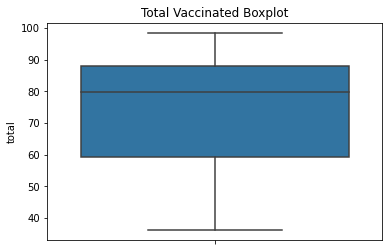

In [30]:
#Using a boxplot to find outliers 
fig, ax = plt.subplots()
sns.boxplot(y = df['total'])
ax.set_title('Total Vaccinated Boxplot')
plt.show()

Phewks! There are no outliers in our data, great Now we can beginning exploring our data to get insights and achieve our objective. 


## 2.3 Exploratory Data Analysis
Here we are going to do three tasks which include;
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis

#### 2.3.1 Univariate Analysis
The purpose of the univariate analysis is to understand the distribution of values for a single variable.

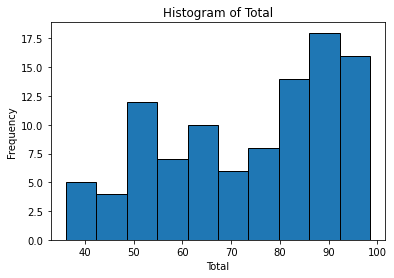

In [38]:
##Visualising the `total` column

n_bins= 10
plt.hist(df['total'], bins=n_bins, edgecolor='black')

plt.title('Histogram of Total')
plt.xlabel('Total')
plt.ylabel('Frequency')

plt.show()

From the histogram above, it means more than 90% vaccines were administered to children in Nigeria


In [48]:
# Analysis of the `vaccine`column
vaccine_proportions = df['vaccine'].value_counts(normalize=True)
print(vaccine_proportions)

Any        0.2
Measles    0.2
Penta 1    0.2
Penta 2    0.2
Penta 3    0.2
Name: vaccine, dtype: float64


This indicates that the distribution of vaccines was evenly spread, and each vaccine type represents approximately 20% of the total

In [50]:
# Analysis of the `state` column
state_proportions = df['state'].value_counts(normalize=True)
print(state_proportions)


Abia                         0.05
Adamawa                      0.05
Kaduna                       0.05
Jigawa                       0.05
Imo                          0.05
Gombe                        0.05
Federal Capital Territory    0.05
Enugu                        0.05
Ekiti                        0.05
Edo                          0.05
Ebonyi                       0.05
Delta                        0.05
Cross River                  0.05
Borno                        0.05
Benue                        0.05
Bayelsa                      0.05
Bauchi                       0.05
Anambra                      0.05
Akwa Ibom                    0.05
Kano                         0.05
Name: state, dtype: float64


All the vaccines were distributed evenly among all the states, from the above analysis in proportion. 

#### 2.3.2 Bivariate Analysis
Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

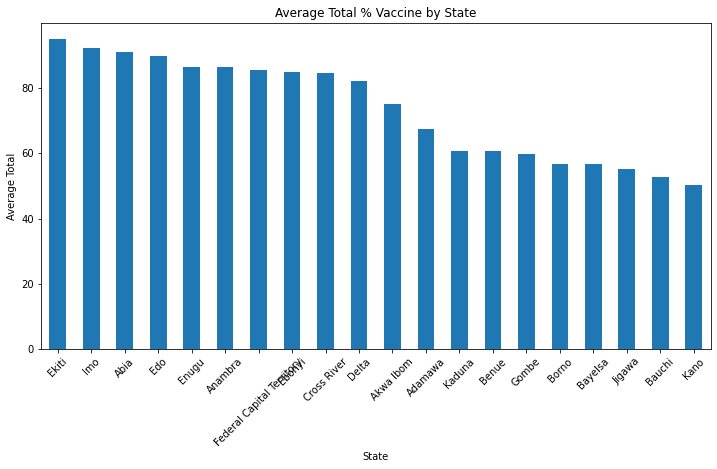

In [70]:
# Group the DataFrame by 'state' and calculate the mean of 'total' for each state
state_totals = df.groupby('state')['total'].mean().sort_values(ascending=False)

# Create a bar plot using the 'state_totals' Series
state_totals.plot(kind='bar', figsize=(12,6))

plt.title('Average Total % Vaccine by State')
plt.xlabel('State')
plt.ylabel('Average Total')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

From the bar plot, we observe that the state that received the highest number of vaccines is 'Ekiti' and the least is 'Kano'

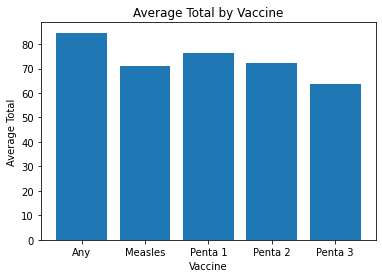

In [58]:
#We are going to do the same with the `vaccine` column and the `total` column

vaccine_totals = df.groupby('vaccine')['total'].mean()

plt.bar(vaccine_totals.index, vaccine_totals.values)
plt.title('Average Total by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Average Total')

plt.show()

The vaccine 'Any' was the most frequent vaccine administered to the children in total and 'Penta 3' was the least administered 
We can go the extra mile and find out, if it is the same case for every single state, let's take a look

In [96]:
# Most common vaccine by state
most_common_vaccine = df.groupby('state')['vaccine'].agg(lambda x: x.value_counts().index[0])
print("Most Common Vaccine by State:")
print(most_common_vaccine)


Most Common Vaccine by State:
state
Abia                         Any
Adamawa                      Any
Akwa Ibom                    Any
Anambra                      Any
Bauchi                       Any
Bayelsa                      Any
Benue                        Any
Borno                        Any
Cross River                  Any
Delta                        Any
Ebonyi                       Any
Edo                          Any
Ekiti                        Any
Enugu                        Any
Federal Capital Territory    Any
Gombe                        Any
Imo                          Any
Jigawa                       Any
Kaduna                       Any
Kano                         Any
Name: vaccine, dtype: object


In [97]:
# Least common vaccine by state
least_common_vaccine = df.groupby('state')['vaccine'].agg(lambda x: x.value_counts().index[-1])
print("Least Common Vaccine by State:")
print(least_common_vaccine)

Least Common Vaccine by State:
state
Abia                         Penta 3
Adamawa                      Penta 3
Akwa Ibom                    Penta 3
Anambra                      Penta 3
Bauchi                       Penta 3
Bayelsa                      Penta 3
Benue                        Penta 3
Borno                        Penta 3
Cross River                  Penta 3
Delta                        Penta 3
Ebonyi                       Penta 3
Edo                          Penta 3
Ekiti                        Penta 3
Enugu                        Penta 3
Federal Capital Territory    Penta 3
Gombe                        Penta 3
Imo                          Penta 3
Jigawa                       Penta 3
Kaduna                       Penta 3
Kano                         Penta 3
Name: vaccine, dtype: object


Wow! It is exactly the same output for all the states, we will have to do research and find out why this is the case

Let us then go ahead to do a statistical analysis of the highest and lowest vaccination rates per state, we are going to group the dataframe by the 'state' column and the find the maximum and minimum values of the 'total' columns of each unique state

In [82]:
# The highest vaccination rate by finding the maximum value in the total column
# We are going to group them by state and total columns

highest_vaccination_rate = df.groupby('state')['total'].max()
highest_vaccination_rate_sorted = highest_vaccination_rate.sort_values(ascending=False)
print(highest_vaccination_rate_sorted)

state
Ekiti                        98.5
Imo                          96.2
Anambra                      96.2
Abia                         95.5
Edo                          95.3
Enugu                        94.9
Ebonyi                       94.0
Delta                        93.8
Cross River                  89.4
Federal Capital Territory    89.0
Benue                        84.4
Kaduna                       83.6
Adamawa                      83.5
Akwa Ibom                    83.5
Bayelsa                      76.7
Jigawa                       72.7
Gombe                        69.7
Borno                        66.7
Bauchi                       65.9
Kano                         63.3
Name: total, dtype: float64


For the highest vaccination rates, the analysis identified the states with the highest rates and provided their corresponding vaccination rates. The highest rates was 98.5 in Ekiti 

In [90]:
# The lowest vaccination rate by finding the minimum value in the total column
# We are going to group them by state and total columns

lowest_vaccination_rate = df.groupby('state')['total'].min()
#lowest_vaccination_rate
lowest_vaccination_rate_sorted = lowest_vaccination_rate.sort_values()
print(lowest_vaccination_rate_sorted[:5])

state
Kano       36.1
Jigawa     38.0
Benue      40.6
Bauchi     41.5
Bayelsa    41.7
Name: total, dtype: float64


Similarly, for the lowest vaccination rates, the analysis identified the states with the lowest rates and provided their corresponding vaccination rates. The lowest rates ranged from 36.1 in Kano to 41.5 in Bauchi. This information helps us identify the states that need more focus and support to improve their vaccination rates.

#### 2.3.3 Multivariate Analysis
This is the analysis of more than 2 variables at the same ime and finding out if they are correlated

A grouped bar chart to compare the total values for each vaccine category across different states. Each bar represents a state, and within each bar, there are grouped bars representing the total values for each vaccine category.

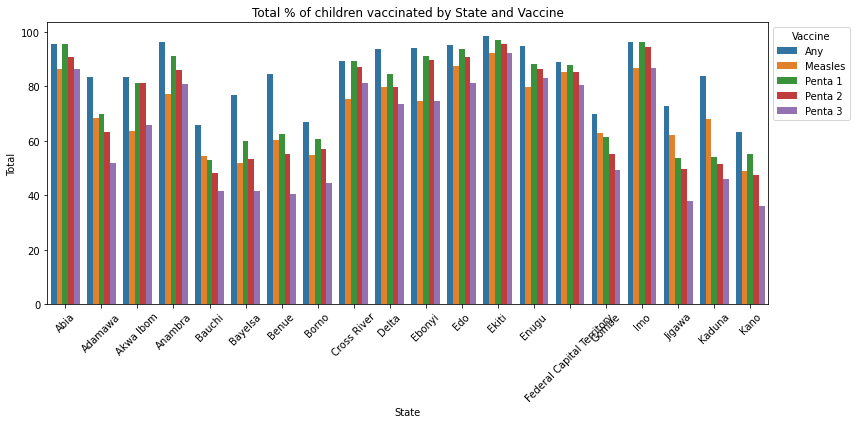

In [98]:


plt.figure(figsize=(12, 6))  # Set the size of the plot

sns.barplot(data=df, x='state', y='total', hue='vaccine')

plt.title('Total % of children vaccinated by State and Vaccine')
plt.xlabel('State')
plt.ylabel('Total')

plt.xticks(rotation=45)

plt.legend(title='Vaccine', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


From the grouped bar chart, we see that Ekiti is still in the lead of the all the states that has the highest percentage of children who have been vaccinated

# 3. Data Report
The following is a summary of the data  exploration and analysis;
1. The 'Any' was the modal vaccine administered in Nigeria in 2018 in all of the states
2. Similarly, the least administered vaccine was 'Penta 3' for all the states. 
3. The state that had the highest vaccination rates was "Ekiti" with 98.5 rate 
4. The lowest vaccination rate was from "Kano" with 36.1
5. The vaccines were all distributed equally and evenly spread among the states.

Now let's go ahead and do some research gain insights why. 